# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [ ]:
sps.t(df=50).rvs(4)

array([ 0.77753885,  1.01495032, -0.86494677, -2.95440279])

Постройте на одном графике плотности распределения Стьюдента и нормального.


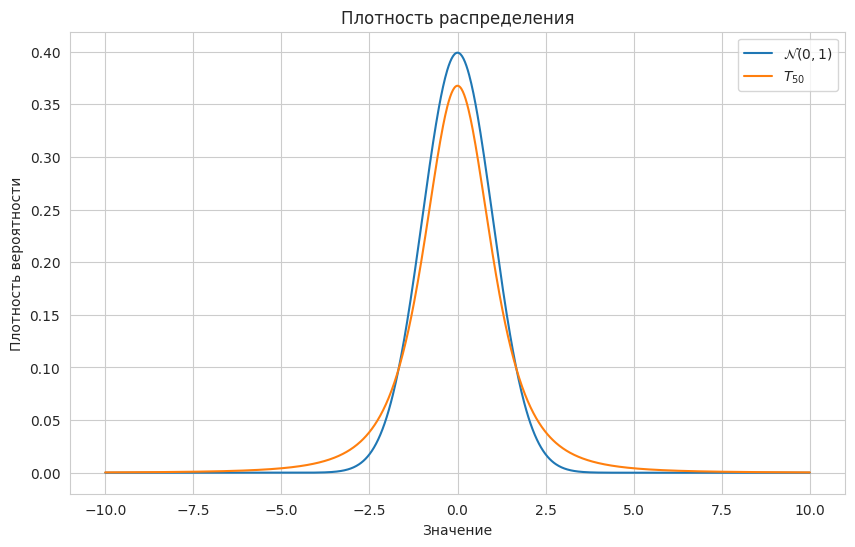

In [ ]:
x = np.linspace(-10, 10, 1000)

pdf_normal = sps.norm.pdf(x)
pdf_student = sps.t(df = 3).pdf(x)

plt.figure(figsize = (10, 6))
plt.plot(x, pdf_normal, label = r'$\mathcal{N}(0, 1)$')
plt.plot(x, pdf_student, label = r'$T_{50}$')

plt.title(r'Плотность распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.grid(True)
plt.show()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:**

При у величении степеней свободы, распределение Стьюдента стремиться к нормальному и как следствие хвосты сновятся более легкими.


### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [ ]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [ ]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются.

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [ ]:
alpha = 0.95
dfs =  np.array([i for i in range(51)])    # массив степеней свобод

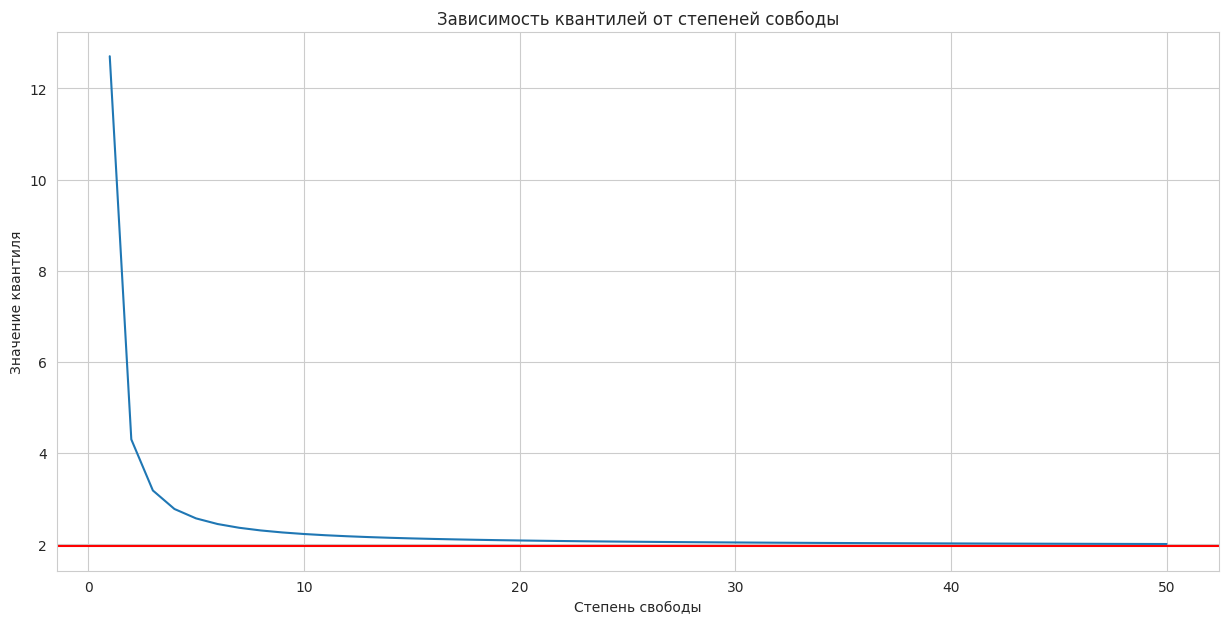

In [ ]:
quantile = [sps.t(loc = 0, scale = 1, df = i).ppf((1 + alpha)/2) for i in dfs]
norm_quantile = sps.norm.ppf((1 + alpha)/2)

plt.figure(figsize = (15, 7))

plt.axhline(norm_quantile, color = 'r')
plt.plot(dfs, quantile)

plt.title('Зависимость квантилей от степеней совбоды')
plt.xlabel('Степень свободы')
plt.ylabel('Значение квантиля')
plt.show()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:**

Видно, что с увеличением количесвта степеней свободы значение квантиля для распределеняи Стьюдента будет стремиться к квантилю для нормального.

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить:
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал:

$$a \in \left(\overline{X} \pm z_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right)$$

Точный доверительный интервал:

$$a \in \left(\overline{X} \pm \frac{T_{n-1}, \frac{1 + \alpha}{2}}{\sqrt{n - 1}}S\right)$$

Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [45]:
sample_size = 30
sample = sps.norm.rvs(sample_size)  # выборка

mean_sample = np.mean(sample)
std_sample = np.std(sample)
alpha = 0.95
z = sps.norm.ppf((1 + alpha)/2)

# асимпотические ДИ
asymptotic_ci =  [mean_sample - (z * std_sample)/np.sqrt(sample_size),
                  mean_sample + (z * std_sample)/np.sqrt(sample_size)]

t = sps.t.ppf((1 + alpha)/2, df = sample_size - 1)

# точные ДИ
precise_ci = [mean_sample - (t * std_sample)/np.sqrt(sample_size - 1),
              mean_sample + (t * std_sample)/np.sqrt(sample_size - 1)]

print(asymptotic_ci, precise_ci)

[27.713067769301194, 27.713067769301194] [27.713067769301194, 27.713067769301194]


Сравните полученные значения для доверительных интервалов.

**Ответ**:

Видно совпадение.

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [24]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    N = sample.shape[0]
    k = np.arange(N) + 1

    means = np.cumsum(sample) / k
    z = sps.norm().ppf((1 + alpha)/2)
    sigmas = np.sqrt(np.cumsum(sample**2) / k - (np.cumsum(sample) / k)**2)

    return means - z * sigmas / np.sqrt(k), means + z * sigmas / np.sqrt(k)


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    N = sample.shape[0]
    k = np.arange(N) + 1

    means = np.cumsum(sample) / k
    sigmas = np.sqrt(np.cumsum(sample**2) / k - (np.cumsum(sample) / k)**2)
    T_k = sps.t(df = (np.arange(N))).ppf((1 + alpha)/2)

    return (means - T_k*sigmas/np.sqrt(k), means + T_k*sigmas/np.sqrt(k))

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [41]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    plt.fill_between(time, right, left, color = color_interval, alpha = 0.2, label = interval_label)
    plt.plot(time, estimation, color = color_estimation, label = label_estimation)
    plt.scatter(time, sample, color = color_sample, label = sample_label)

    plt.legend(fontsize = 16)
    plt.ylim(ylim)
    plt.xlim(0, time[-1] + 0.1)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.grid()

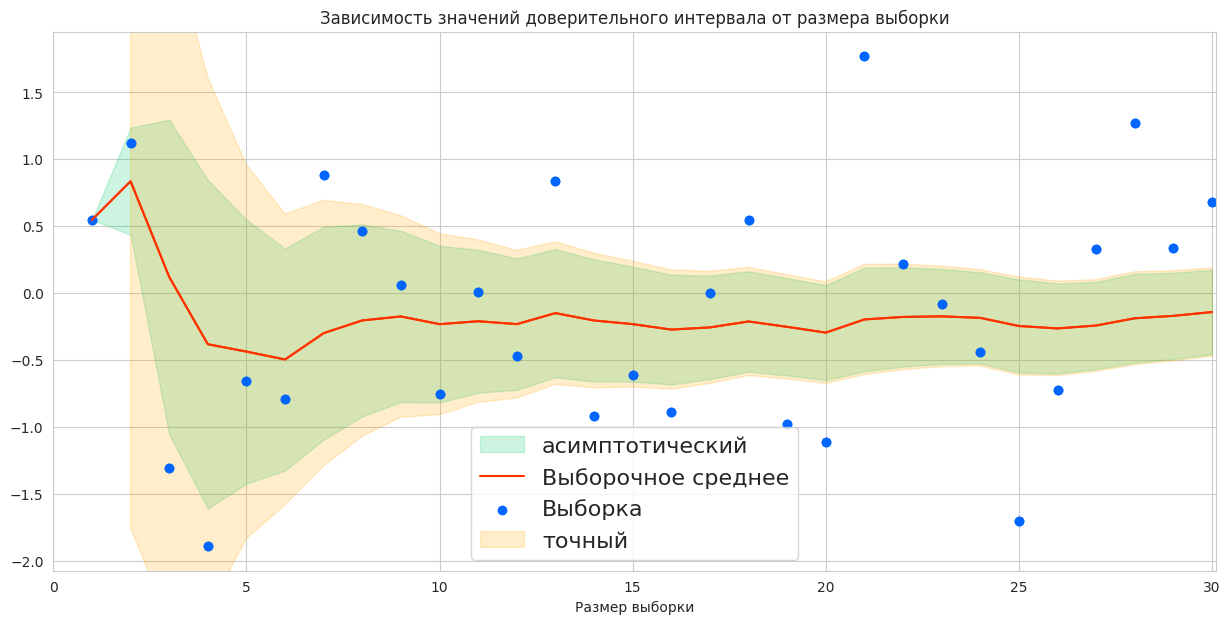

In [43]:
sample = sps.norm().rvs(sample_size)
estimation = np.cumsum(sample)/(np.arange(sample_size) + 1)
left_as, right_as = calculate_asymptotic_confidence_intervals(sample, alpha = 0.95)
left, right = calculate_confidence_intervals(sample, alpha = 0.95)

plt.figure(figsize = (15, 7))

draw_confidence_interval(
    left_as, right_as, estimation = estimation, sample = sample,
    ylim = (None, None), color_estimation = '#FF3300', color_interval = '#00CC66',
    color_sample = '#0066FF', label_estimation = 'Выборочное среднее', sample_label = 'Выборка', interval_label = 'асимптотический'
)

draw_confidence_interval(
    left, right, estimation = estimation, sample = sample,
    ylim = (None, None), color_estimation = '#FF3300', color_interval = 'orange',
    color_sample = '#0066FF', label_estimation = None, sample_label = None, interval_label = 'точный'
)

**Вывод:**

Сначала точный интервал гораздо шире асимптотического в начале, но зато он всегда охватывает реальное значение параметра.

Поэтому, для небольших размеров выборки более логично использовать именно точный доверительный интервал.

Для больших же размеров доверительные интервалы начинают совпадать, так как в пределе точный интервал переходит в асимптотический.


## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [ ]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

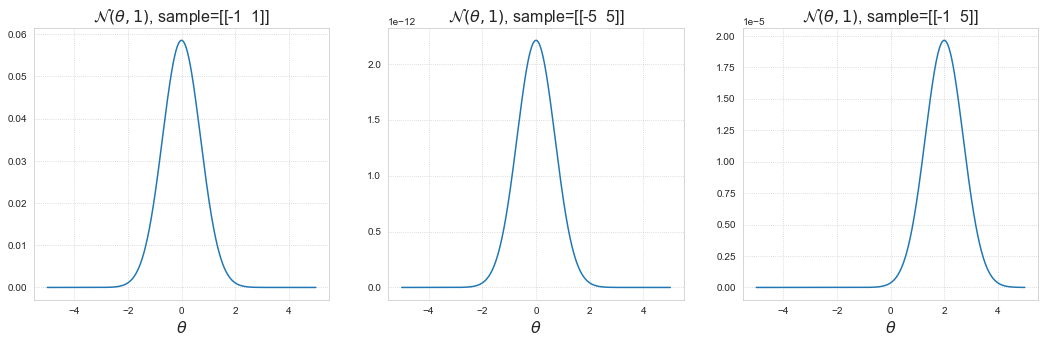

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

In [ ]:
# ваш код

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [ ]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [ ]:
# ваш код